In [64]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima #to figure out the best orders for p,d,q using gridsearch
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load a non-stationary dataset
df1 = pd.read_csv('time_series/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('time_series/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [16]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.068, Time=2.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 07 Feb 2023   AIC                           2459.074
Time:                        17:43:43   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],m=12,start_p=0, start_q=0, max_p=0, max_q=4, seasonal=True,trace=True)
# m is no of periods per season
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.49 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.46 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=5.35 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=1.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.68 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=1021.148, Time=1.34 sec
 ARIMA(0,1,1)(2,1,0)[12] intercept   : AIC=1021.017, Time=1.53 sec

Best model:  ARIMA(0,1,1)(2,1,0)[12]          
Total fit time: 13.932 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 07 Feb 2023   AIC                           1019.178
Time:                                     17:53:46   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
df2 = df2[:120] #for initial 4 months it will be stationary
df3 = pd.read_csv('time_series/Data/TradeInventories.csv', index_col='Date', parse_dates=True)
df3.index.freq = 'MS'

## ARMA

<AxesSubplot:xlabel='Date'>

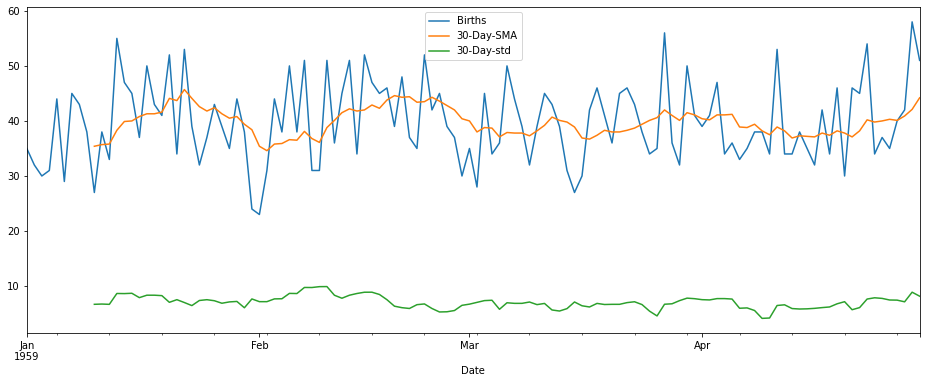

In [32]:
df2['30-Day-SMA'] = df2['Births'].rolling(10).mean()
df2['30-Day-std'] = df2['Births'].rolling(10).std()
df2[['Births', '30-Day-SMA', '30-Day-std']].plot(figsize=(16,6))

In [37]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [38]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [39]:
auto_arima(df2['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 07 Feb 2023   AIC                           2459.074
Time:                        18:38:14   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
#for 1 month forecast keep test_data equals 1 month=30 days, total data is 120 days
train = df2.iloc[:90]
test = df2.iloc[90:]
model = ARIMA(train['Births'], order=(1,1,1))
results = model.fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -307.284
Date:                Tue, 07 Feb 2023   AIC                            620.568
Time:                        18:50:54   BIC                            628.034
Sample:                    01-01-1959   HQIC                           623.578
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0968      0.114      0.850      0.396      -0.126       0.320
ma.L1         -0.9997      5.737     -0.174      0.862     -12.244      10.244
sigma2        55.6606    316.917      0.176      0.861    -565.485     676.806
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.79   Prob(JB):                         0.38
Heteroskedasticity (H):               0.78   Skew:                             0.21
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
start = len(train)
end = len(df2)-1
predictions = results.predict(start,end).rename('ARMA (1,1) Predictions')
predictions

1959-04-01    39.882239
1959-04-02    39.774062
1959-04-03    39.763593
1959-04-04    39.762579
1959-04-05    39.762481
1959-04-06    39.762472
1959-04-07    39.762471
1959-04-08    39.762471
1959-04-09    39.762471
1959-04-10    39.762471
1959-04-11    39.762471
1959-04-12    39.762471
1959-04-13    39.762471
1959-04-14    39.762471
1959-04-15    39.762471
1959-04-16    39.762471
1959-04-17    39.762471
1959-04-18    39.762471
1959-04-19    39.762471
1959-04-20    39.762471
1959-04-21    39.762471
1959-04-22    39.762471
1959-04-23    39.762471
1959-04-24    39.762471
1959-04-25    39.762471
1959-04-26    39.762471
1959-04-27    39.762471
1959-04-28    39.762471
1959-04-29    39.762471
1959-04-30    39.762471
Freq: D, Name: ARMA (1,1) Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

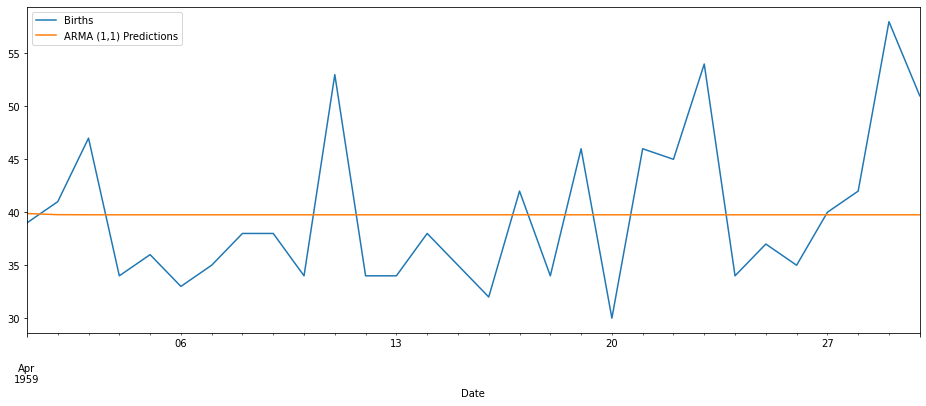

In [53]:
test['Births'].plot(figsize=(16,6), legend=True)
predictions.plot(legend=True) #It is showing that it has forecasted the average value, and not predict the noise

In [55]:
test['Births'].mean(), predictions.mean()

(39.833333333333336, 39.766890930550524)

## Full ARIMA 

In [80]:
df3

,Inventories,diff_1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
...,...,...
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0
2018-10-01,2144639,10467.0


<AxesSubplot:xlabel='Date'>

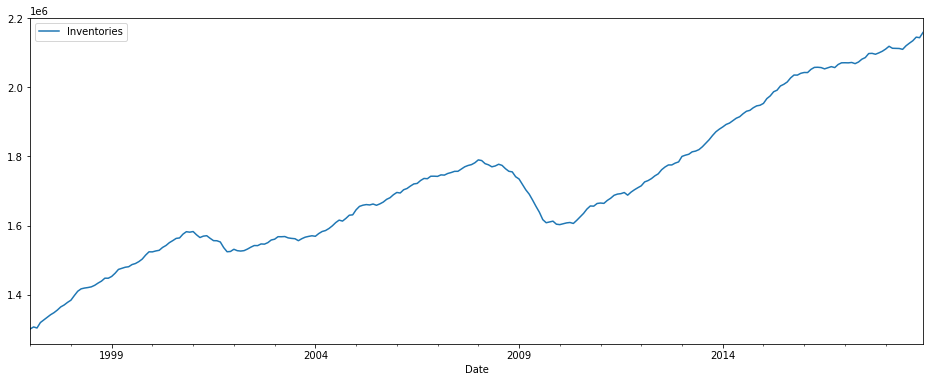

In [58]:
df3.plot(figsize=(16,6))

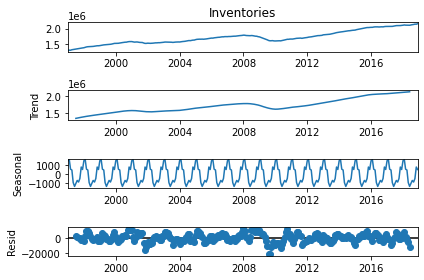

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose #ETS decomposition
result = seasonal_decompose(df3['Inventories'], model='add')
result.plot();
#For building this we will not consider full seasonal model as the range of seasonal values is too small as compared to actual
#trend and observed values

In [71]:
auto_arima(df3['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 07 Feb 2023   AIC                           5348.037
Time:                        23:48:27   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
from statsmodels.tsa.statespace.tools import diff
df3['diff_1'] = diff(df3['Inventories'], k_diff=1) #since above d=1
#After differncing for 1 order the data should be stationary from above auto_arima d order

In [74]:
adf_test(df3['diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


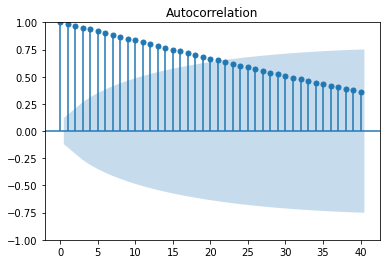

In [76]:
plot_acf(df3['Inventories'], lags=40);
#If ACF plot shows -ve autocorrelation in 1st lag or ACF decays gradually, then autocorrelation pattern can be explained
#more easily by adding AR terms than adding MA terms(q=0 or 1)

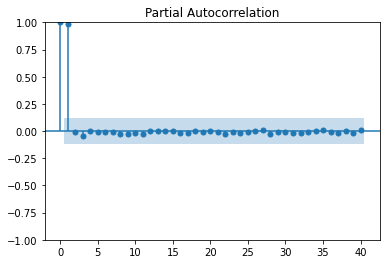

In [77]:
plot_pacf(df3['Inventories'], lags=40);
#If the pacf plot shows positive autocorrelation at 1st lag or there is sharp drop, then the lag at which PACF cuts off,
#indicate order of AR terms. So, p=1

In [78]:
stepwise_fit = auto_arima(df3['Inventories'], start_p=0, start_q=0, seasonal=False, max_p=2,max_q=2,
                        trace=True) 
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.773 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 08 Feb 2023   AIC                           5348.037
Time:                        00:22:05   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
len(df3)

264

In [89]:
train = df3.iloc[:252]
test = df3.iloc[252:]
model = ARIMA(train['Inventories'], order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2579.217
Date:                Wed, 08 Feb 2023   AIC                           5160.434
Time:                        00:57:14   BIC                           5163.959
Sample:                    01-01-1997   HQIC                          5161.852
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.911e+07   4.75e+06     10.330      0.000    3.98e+07    5.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               105.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
start = len(train)
end = len(df3) - 1
predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA (0,1,0) Predictions')
#typ='levels' for original variables without differncing
predictions

2018-01-01    2103751.0
2018-02-01    2103751.0
2018-03-01    2103751.0
2018-04-01    2103751.0
2018-05-01    2103751.0
2018-06-01    2103751.0
2018-07-01    2103751.0
2018-08-01    2103751.0
2018-09-01    2103751.0
2018-10-01    2103751.0
2018-11-01    2103751.0
2018-12-01    2103751.0
Freq: MS, Name: ARIMA (0,1,0) Predictions, dtype: float64

In [84]:
test

,Inventories,diff_1
Date,,
2018-01-01,2110158,6407.0
2018-02-01,2118199,8041.0
2018-03-01,2112427,-5772.0
2018-04-01,2112276,-151.0
2018-05-01,2111835,-441.0
2018-06-01,2109298,-2537.0
2018-07-01,2119618,10320.0
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0


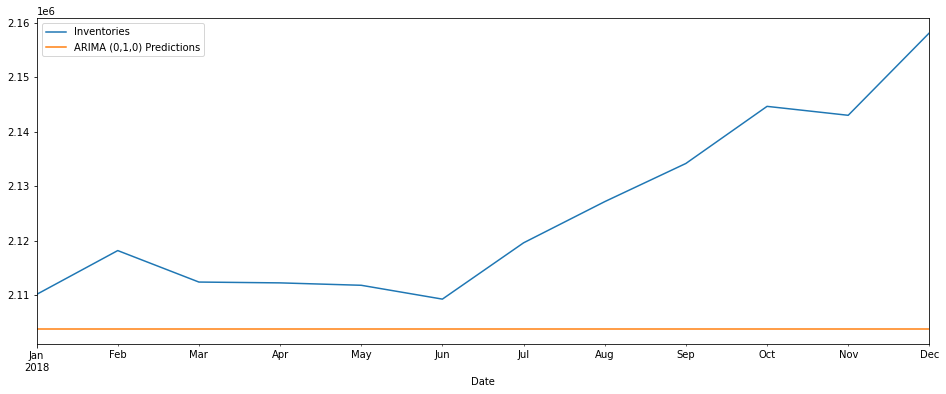

In [100]:
test['Inventories'].plot(figsize=(16,6), legend=True)
predictions.plot(legend=True);

In [92]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['Inventories'], predictions)
error #less differnce between the test mean and rsme

26437.5793931038

In [95]:
test['Inventories'].mean()

2125075.6666666665

In [104]:
#Forecast into the future
model = ARIMA(df3['Inventories'], order=(0,1,0))
results = model.fit()
forecast = results.predict(start=len(df3),end=len(df3)+11,typ='levels').rename('ARIMA (0,1,0) Forecast')

<AxesSubplot:xlabel='Date'>

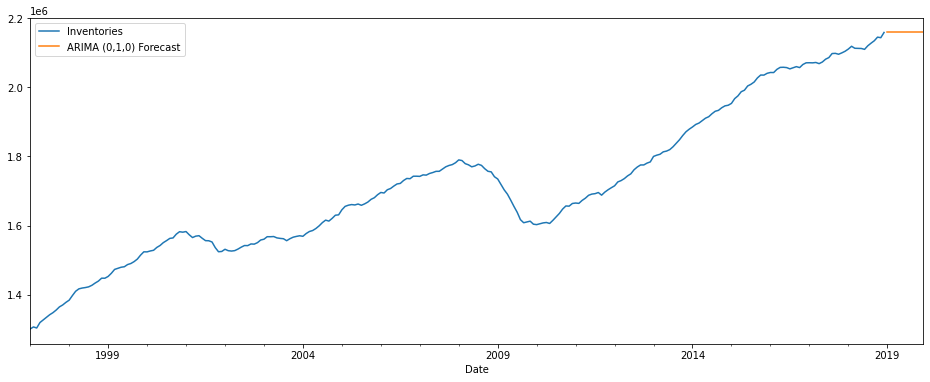

In [105]:
df3['Inventories'].plot(figsize=(16,6),legend=True)
forecast.plot(legend=True)